In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Replace the file path with the path to your dataset
X_train = pd.read_csv('X_train.csv.xls')
X_train

,Unnamed: 0,Suburb,Rooms,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,41001,243,3,180,2018-07-21,3163,5,4442,10.1,8,1,0,0,0,1,0,0,0
1,12003,5,3,108,2017-10-07,3020,6,2185,10.5,3,0,1,0,0,1,0,0,0
2,30672,88,2,403,2017-09-16,3058,2,11204,6.7,6,0,1,0,0,0,0,0,1
3,61564,218,3,403,2018-06-30,3032,6,4918,4.3,16,0,1,0,0,0,0,1,0
4,20664,161,2,28,2018-08-11,3046,2,2606,11.2,24,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36319,27615,278,3,28,2017-07-15,3073,2,21650,12.0,6,1,0,0,0,1,0,0,0
36320,59798,251,2,180,2017-10-28,3070,2,11364,5.3,6,0,1,0,0,1,0,0,0
36321,55526,12,3,253,2016-11-27,3032,6,6567,4.3,22,1,0,0,1,0,0,0,0
36322,56737,140,5,28,2018-04-28,3156,0,10788,24.8,13,1,0,0,0,0,0,0,1


In [3]:
X_train = X_train.drop(labels=['Unnamed: 0','Date'], axis=1)

In [4]:
X_train.columns

Index(['Suburb', 'Rooms', 'SellerG', 'Postcode', 'Regionname', 'Propertycount',
       'Distance', 'CouncilArea', 'Type_h', 'Type_t', 'Type_u', 'Method_PI',
       'Method_S', 'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

In [5]:
X_test = pd.read_csv('X_test.csv.xls')
X_test.drop(['Unnamed: 0','Date'], axis=1,inplace=True)
X_test

,Suburb,Rooms,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
0,313,2,108,3020,6,3755,10.5,3,1,0,0,0,1,0,0,0
1,10,3,28,3022,6,1281,12.8,3,1,0,0,0,0,0,1,0
2,254,3,28,3046,2,2651,11.2,24,1,0,0,0,1,0,0,0
3,140,3,121,3156,0,10788,24.8,13,1,0,0,0,1,0,0,0
4,214,3,178,3012,6,3873,6.4,16,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12104,33,3,56,3165,5,10969,13.8,8,1,0,0,0,1,0,0,0
12105,275,4,28,3072,2,14577,8.4,6,1,0,0,0,1,0,0,0
12106,302,2,390,3141,5,14887,2.7,18,0,0,1,1,0,0,0,0
12107,218,4,180,3032,6,4918,4.3,16,1,0,0,0,1,0,0,0


In [6]:
y_train = pd.read_csv('y_train.csv.xls')
y_train.drop('Unnamed: 0', axis=1,inplace=True)
y_train

,Price
0,1300000.0
1,646000.0
2,620000.0
3,690000.0
4,450000.0
...,...
36319,1175000.0
36320,843000.0
36321,1410000.0
36322,940000.0


In [7]:
y_test = pd.read_csv('y_test.csv.xls')
y_test.drop('Unnamed: 0', axis=1,inplace=True)
y_test

,Price
0,688000.0
1,455000.0
2,723000.0
3,880000.0
4,930000.0
...,...
12104,1140000.0
12105,1615000.0
12106,860000.0
12107,1440000.0


In [8]:
# Choose the degree of the polynomial
degree = 1

# Create the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [9]:
# Make predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set results:")
print("MSE: ", mse_train)
print("R^2: ", r2_train)

print("\nTesting set results:")
print("MSE: ", mse_test)
print("R^2: ", r2_test)

Training set results:
MSE:  208580036832.13638
R^2:  0.4090765054462925

Testing set results:
MSE:  208219329386.5689
R^2:  0.40501767863726856


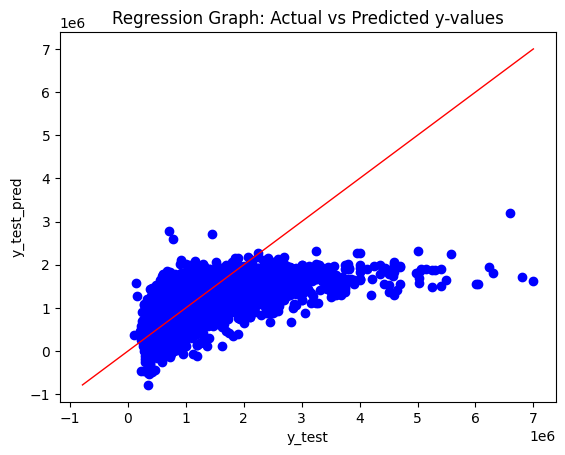

In [10]:
y_test_np = y_test.to_numpy();

# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

In [11]:
# Choose the degree of the polynomial
degree = 2

# Create the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [12]:
# Make predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set results:")
print("MSE: ", mse_train)
print("R^2: ", r2_train)

print("\nTesting set results:")
print("MSE: ", mse_test)
print("R^2: ", r2_test)

Training set results:
MSE:  138706157155.15872
R^2:  0.6070346503572309

Testing set results:
MSE:  138102467734.32803
R^2:  0.6053751249676609


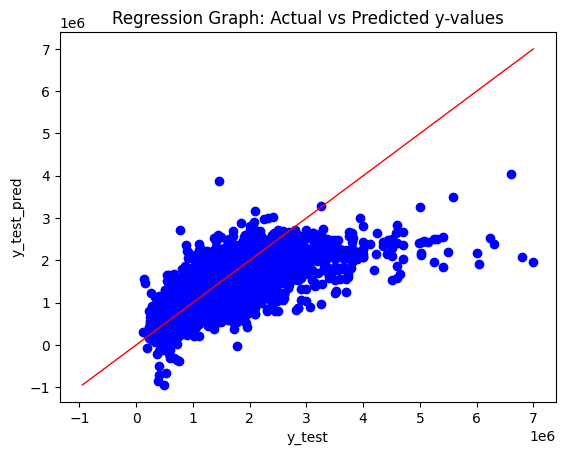

In [13]:
# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

Training set results:
MSE:  115088360088.03072
R^2:  0.6739457094812615

Testing set results:
MSE:  115796542868.53609
R^2:  0.6691138325885666


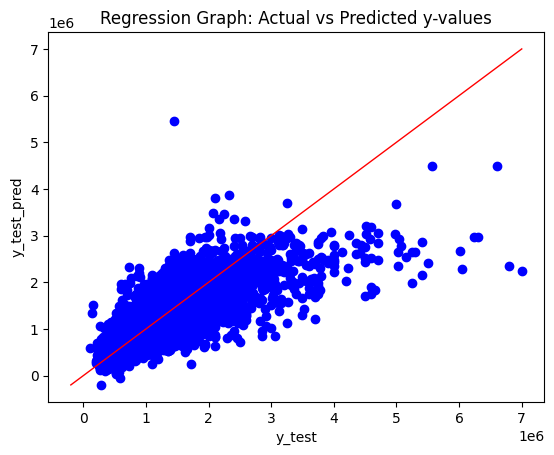

In [14]:
# Choose the degree of the polynomial
degree = 3

# Create the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set results:")
print("MSE: ", mse_train)
print("R^2: ", r2_train)

print("\nTesting set results:")
print("MSE: ", mse_test)
print("R^2: ", r2_test)

# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

Training set results:
MSE:  104916896221.6166
R^2:  0.7027622590607665

Testing set results:
MSE:  110179287634.19829
R^2:  0.6851650203858741


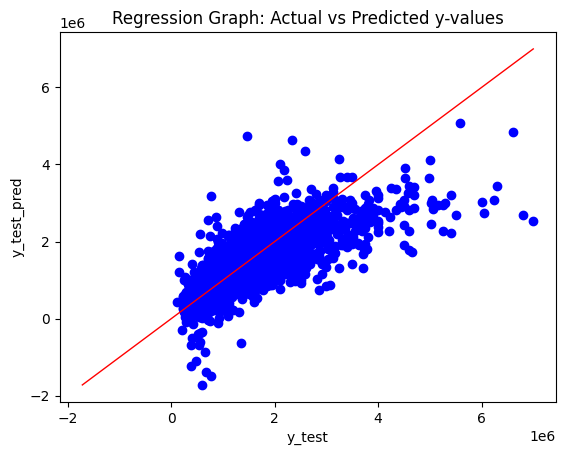

In [15]:
# Choose the degree of the polynomial
degree = 4

# Create the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate the mean squared error and R-squared score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training set results:")
print("MSE: ", mse_train)
print("R^2: ", r2_train)

print("\nTesting set results:")
print("MSE: ", mse_test)
print("R^2: ", r2_test)

# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

In [15]:
def stepwise_polynomial_regression(X, y, max_degree=4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_mse = float('inf')
    best_degree = 0
    best_model = None

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = sm.OLS(y_train, X_train_poly).fit()

        y_test_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_test_pred)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model = model

    return best_model, best_degree, best_mse


In [ ]:
best_model, best_degree, best_mse = stepwise_polynomial_regression(X_train, y_train, max_degree=4)
print(f"Best polynomial degree: {best_degree}")
print(f"Best model MSE: {best_mse}")


Best polynomial degree: 4
Best model MSE: 120311120777.2005


In [ ]:
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_train)
y_pred = best_model.predict(X_poly)

# Evaluate the model using metrics like R-squared, MSE, etc.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=1):
    best_mse = float('inf')
    best_degree = 0
    best_model = None
    mse_list = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = sm.OLS(y_train, X_train_poly).fit()

        y_test_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_test_pred)
        mse_list.append(mse)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model = model

    return best_model, best_degree, best_mse, mse_list

best_model, best_degree, best_mse, mse_list = stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=1)

# Print the mean squared error for each degree
for degree, mse in enumerate(mse_list, 1):
    print(f"Degree {degree}: MSE = {mse}")

print(f"Best polynomial degree: {best_degree}")
print(f"Best model MSE: {best_mse}")

# Use the best model for prediction and evaluation
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_test)
y_pred = best_model.predict(X_poly)

# Evaluate the model using metrics like R-squared, MSE, etc.


Degree 1: MSE = 208219329386.56958
Best polynomial degree: 1
Best model MSE: 208219329386.56958


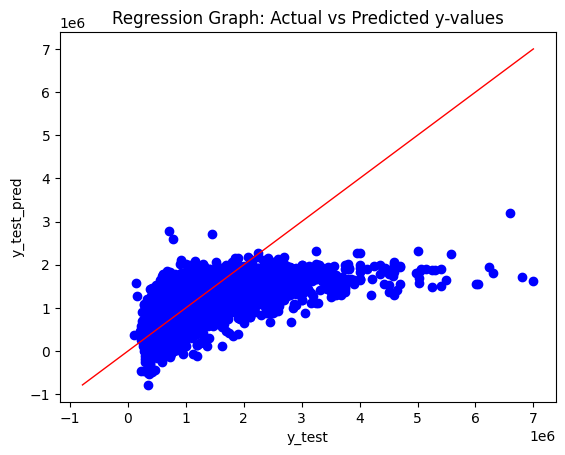

In [18]:
# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_pred.min())
max_val = max(y_test_np.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=1):
    best_mse = float('inf')
    best_degree = 0
    best_model = None
    mse_list = []
    r2_list = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = sm.OLS(y_train, X_train_poly).fit()

        y_test_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_test_pred)
        mse_list.append(mse)
        
        r2 = r2_score(y_test, y_test_pred)
        r2_list.append(r2)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model = model

    return best_model, best_degree, best_mse, mse_list, r2_list

best_model, best_degree, best_mse, mse_list, r2_list = stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=2)

# Print the mean squared error and R^2 score for each degree
for degree, (mse, r2) in enumerate(zip(mse_list, r2_list), 1):
    print(f"Degree {degree}: MSE = {mse}, R^2 = {r2}")

print(f"Best polynomial degree: {best_degree}")
print(f"Best model MSE: {best_mse}")

# Use the best model for prediction and evaluation
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_test)
y_test_pred = best_model.predict(X_poly)

# Evaluate the model using metrics like R-squared, MSE, etc.


Degree 1: MSE = 208219329386.56958, R^2 = 0.4050176786372667
Degree 2: MSE = 138102467675.16956, R^2 = 0.605375125136705
Best polynomial degree: 2
Best model MSE: 138102467675.16956


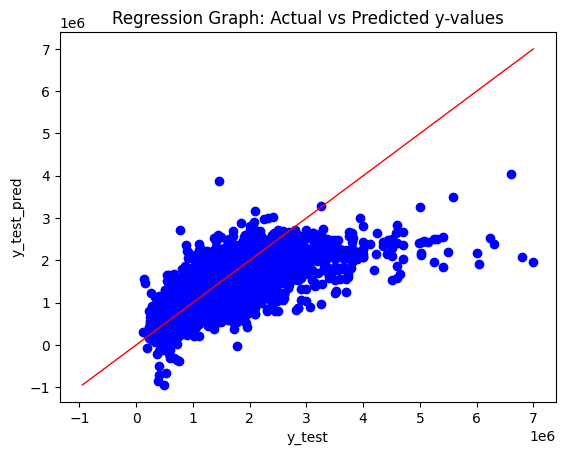

In [20]:
# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=1):
    best_mse = float('inf')
    best_degree = 0
    best_model = None
    mse_list = []
    r2_list = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = sm.OLS(y_train, X_train_poly).fit()

        y_test_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_test_pred)
        mse_list.append(mse)
        
        r2 = r2_score(y_test, y_test_pred)
        r2_list.append(r2)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model = model

    return best_model, best_degree, best_mse, mse_list, r2_list

best_model, best_degree, best_mse, mse_list, r2_list = stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=3)

# Print the mean squared error and R^2 score for each degree
for degree, (mse, r2) in enumerate(zip(mse_list, r2_list), 1):
    print(f"Degree {degree}: MSE = {mse}, R^2 = {r2}")

print(f"Best polynomial degree: {best_degree}")
print(f"Best model MSE: {best_mse}")

# Use the best model for prediction and evaluation
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_test)
y_test_pred = best_model.predict(X_poly)

# Evaluate the model using metrics like R-squared, MSE, etc.

Degree 1: MSE = 208219329386.56958, R^2 = 0.4050176786372667
Degree 2: MSE = 138102467675.16956, R^2 = 0.605375125136705
Degree 3: MSE = 116814775842.09789, R^2 = 0.6662042534439083
Best polynomial degree: 3
Best model MSE: 116814775842.09789


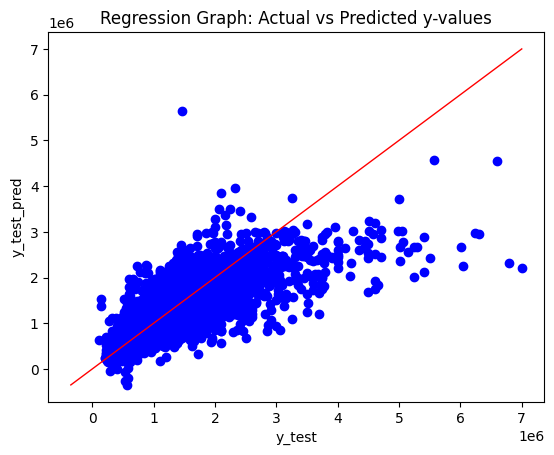

In [22]:
# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=1):
    best_mse = float('inf')
    best_degree = 0
    best_model = None
    mse_list = []
    r2_list = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = sm.OLS(y_train, X_train_poly).fit()

        y_test_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_test_pred)
        mse_list.append(mse)
        
        r2 = r2_score(y_test, y_test_pred)
        r2_list.append(r2)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model = model

    return best_model, best_degree, best_mse, mse_list, r2_list

best_model, best_degree, best_mse, mse_list, r2_list = stepwise_polynomial_regression(X_train, y_train, X_test, y_test, max_degree=4)

# Print the mean squared error and R^2 score for each degree
for degree, (mse, r2) in enumerate(zip(mse_list, r2_list), 1):
    print(f"Degree {degree}: MSE = {mse}, R^2 = {r2}")

print(f"Best polynomial degree: {best_degree}")
print(f"Best model MSE: {best_mse}")

# Use the best model for prediction and evaluation
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_test)
y_test_pred = best_model.predict(X_poly)

# Evaluate the model using metrics like R-squared, MSE, etc.

Degree 1: MSE = 208219329386.56958, R^2 = 0.4050176786372667
Degree 2: MSE = 138102467675.16956, R^2 = 0.605375125136705
Degree 3: MSE = 116814775842.09789, R^2 = 0.6662042534439083
Degree 4: MSE = 108274829523.54047, R^2 = 0.6906069690798572
Best polynomial degree: 4
Best model MSE: 108274829523.54047


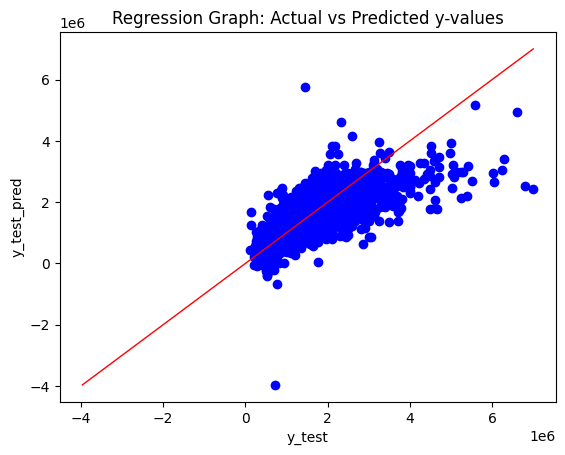

In [24]:
# Plot the actual y-values (y_test) against the predicted y-values (y_test_pred)
plt.scatter(y_test_np, y_test_pred, color='blue')

# Add labels to the axes
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Add a 45-degree line to show perfect predictions
min_val = min(y_test_np.min(), y_test_pred.min())
max_val = max(y_test_np.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

plt.title('Regression Graph: Actual vs Predicted y-values')
plt.show()

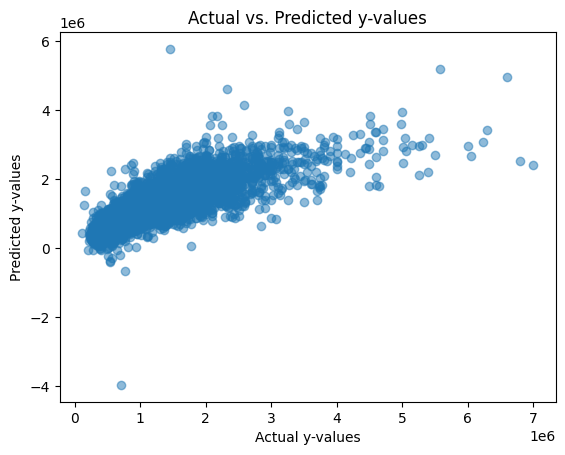

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (rest of the code from the previous example) ...

# Use the best model for prediction and evaluation
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_test)
y_pred = best_model.predict(X_poly)

# Evaluate the model using metrics like R-squared, MSE, etc.

# Create a scatter plot comparing the predicted y-values and the actual y-values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual y-values')
plt.ylabel('Predicted y-values')
plt.title('Actual vs. Predicted y-values')
plt.show()
